<a href="https://colab.research.google.com/github/JennEYoon/ECG-transform/blob/main/notebooks/demo_read_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Environment  
This notebook assumes you will use Google Colab to run this Jupyter Notebook  

Let's see what the current working directory is.  Use Unix terminal command "!" and "pwd" to show the path in cell below.  

In [ ]:
!pwd


/content


# I. Demo, reading 100.csv file   
First upload 100.csv and 200.csv files to Google Colab.  Then read 100.csv into pandas dataframe

Let's see if the files have been uploaded.  Use "!ls" command, bang letter l, letter s.  This is Unix command for list.  
You should see "100.csv   200.csv   sample_data" in the printout below.

In [ ]:
!ls

100.csv  200.csv  sample_data


Now let's import the Python libraries we're going to use today.

In [ ]:
# libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


We're ready to read 100.csv file into Pandas dataframe.  This will allow us to manipulate the table-like data in a convenient way.

In [ ]:
# Read in 100.csv file as a Pandas DataFrame object
df100 = pd.read_csv('/content/100.csv')
print(type(df100))
print(df100)
print(len(df100))

<class 'pandas.core.frame.DataFrame'>
        Unnamed: 0       time_ms   MLII     V5
0                0  0.000000e+00 -0.145 -0.065
1                1  2.777778e+00 -0.145 -0.065
2                2  5.555556e+00 -0.145 -0.065
3                3  8.333333e+00 -0.145 -0.065
4                4  1.111111e+01 -0.145 -0.065
...            ...           ...    ...    ...
649995      649995  1.805542e+06 -0.075 -0.480
649996      649996  1.805544e+06 -0.445 -0.410
649997      649997  1.805547e+06 -0.675 -0.365
649998      649998  1.805550e+06 -0.765 -0.335
649999      649999  1.805553e+06 -1.280  0.000

[650000 rows x 4 columns]
650000


In [ ]:
print(df100.describe())

          Unnamed: 0       time_ms           MLII             V5
count  650000.000000  6.500000e+05  650000.000000  650000.000000
mean   324999.500000  9.027764e+05      -0.306299      -0.191034
std    187638.981824  5.212194e+05       0.193200       0.148213
min         0.000000  0.000000e+00      -2.715000      -2.465000
25%    162499.750000  4.513882e+05      -0.390000      -0.265000
50%    324999.500000  9.027764e+05      -0.335000      -0.205000
75%    487499.250000  1.354165e+06      -0.270000      -0.145000
max    649999.000000  1.805553e+06       1.435000       1.225000


Let's plot a figure with just the first 5 seconds of heart beats.  This data is digitized at 360 samples per second (Hertz), so 5 seconds of data is 360 x 5 = 1,800 sample rows. We use Pandas to select a subset of the dataframe.  Note, first row was identified as a header row by default, when we read the .csv file.

In [ ]:
# example:  selected_data = df.iloc[1:4, 2:5]
# row from 1 upto but excluding 4, col from 2 upto but excluding 5.

df5sec = df100.iloc[1:1801, 2:5]
df5sec

,MLII,V5
1,-0.145,-0.065
2,-0.145,-0.065
3,-0.145,-0.065
4,-0.145,-0.065
5,-0.145,-0.065
...,...,...
1796,-0.445,-0.270
1797,-0.480,-0.290
1798,-0.495,-0.280
1799,-0.520,-0.195


Now we use Matplotlib to make a figure.

In [ ]:
X1 = df5sec['MLII'].to_numpy()
X2 = df5sec['V5'].to_numpy()
type(X1), type(X2)

(numpy.ndarray, numpy.ndarray)

In [ ]:
Y = df5sec.index / 360
Y.to_numpy()
Y = np.round(Y, 2)
Y

Index([ 0.0, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.03,
       ...
       4.97, 4.98, 4.98, 4.98, 4.99, 4.99, 4.99, 4.99,  5.0,  5.0],
      dtype='float64', length=1800)

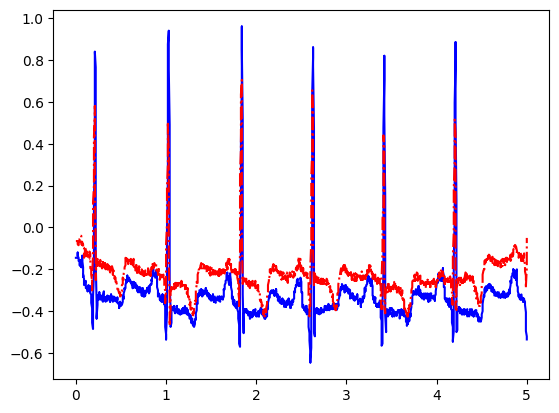

In [ ]:
# plot with time as X-axis
plt.plot(Y, X1, 'b-')
plt.plot(Y, X2, 'r-.')

<Figure size 640x480 with 0 Axes>

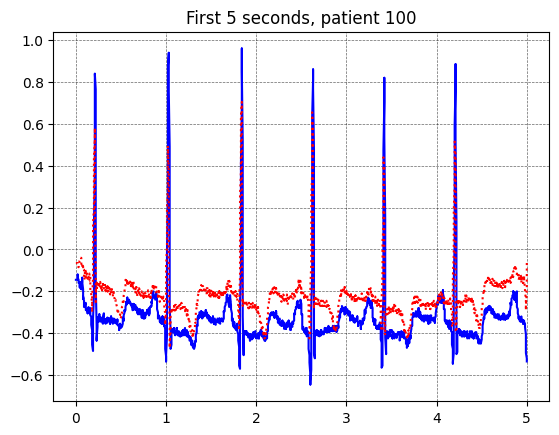

In [ ]:
# Customize gridlines
# example: plt.grid(color='r', linestyle='--', linewidth=0.5, alpha=0.6)
fig = plt.figure(3)
ax1, ax2 = plt.subplots()
ax1 = plt.plot(Y, X1, 'b-')
ax2 = plt.plot(Y, X2, 'r:')
plt.grid(color='k', linestyle='--', linewidth=0.5, alpha=0.6)
plt.title('First 5 seconds, patient 100')
plt.savefig('5sec_p100.png')

# II. Now it's your turn.  
Try reading in 200.csv file uploaded to Google Colab instance.  Try some Pandas and Matplotlib code.  

In [ ]:
# your code here

In [ ]:
# your code here

# III. Reading in Kaggle version of PTB csv files  
Kaggle.com has a csv format for PTB database, with their own choice of pre-processing, standarization, and sampling rate.   

Data is available at a shared Google Drive folder for download:  
https://drive.google.com/drive/u/0/folders/10g2ykTyd34b3VZ_TBanyEUpubhPhqhKb  

ptbdb_normal.csv
ptbdb_abnormal.csv  

Download to your local computer, then upload to Colab instance the aboe 2 PTBdb files.  

In [9]:
# make sure files have been uploaded to Google Colab instance.
# you should bee "ptbdb_abnormal.csv" and "ptbdb_normal.csv" printout below
!ls -lh

total 66M
-rw-r--r-- 1 root root  30K Dec 23 04:02 ptb_ab10.csv
-rw-r--r-- 1 root root  48M Dec 23 03:34 ptbdb_abnormal.csv
-rw-r--r-- 1 root root  19M Dec 23 03:34 ptbdb_normal.csv
-rw-r--r-- 1 root root  33K Dec 23 04:02 ptb_n10.csv
drwxr-xr-x 1 root root 4.0K Dec 19 14:20 sample_data


Now let's import the Python libraries.  If you've run cell above to import libraries, you can skip the next cell.  Else run the cell below.

In [10]:
# import libraries
import pandas as pd
import numpy as np#
import matplotlib.pyplot as plt

In [11]:
df_ptb_ab = pd.read_csv('/content/ptbdb_abnormal.csv')
df_ptb_ab.head()

,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
df_ptb_n = pd.read_csv('/content/ptbdb_normal.csv')
df_ptb_n.head()

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# printout lengths of each dataframe
print(len(df_ptb_ab))
print(len(df_ptb_n))

10505
4045


This dataset contains 14,552 samples, downsample to 125 Hz, with 2 classification categories, abnormal and normal.  All samples have been cropped, downsampled and padded with zeroes if necessary to fit the fixed-dimension of 188 columns. (10505+4045 = 14550. missing 2 samples)

Each row represents one example.  The last column of each row represents classification category. (abnormal: 1.0, normal: 0.0)

We'll create smaller text files for exercises here.  
Let's create 10 samples from each, and save them into a separte csv files.  


In [14]:
df_ptb_ab10 = df_ptb_ab.iloc[0:10, :]
#print(type(df_ptb_ab10))
#print(df_ptb_ab10.head(3))

df_ptb_n10 = df_ptb_n.iloc[0:10, :]
#print(type(df_ptb_n10))
#print(df_ptb_n.head(3))

In [15]:
type(df_ptb_ab10), type(df_ptb_n10)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [27]:
# Save smaller dataframe as csv files to work with them again later.
# df.to_csv('your_file_name.csv', index=False)  does not add a column for row index
df_ptb_ab10.to_csv('ptb_ab10.csv', index=False)
df_ptb_n10.to_csv('ptb_n10.csv', index=False)
# smaller csv biles are 30KB and 33KB size.
# Download and save these to you local computer, if you wish to work with them on your own.

In [28]:
!ls -lh


total 66M
-rw-r--r-- 1 root root  30K Dec 23 04:02 ptb_ab10.csv
-rw-r--r-- 1 root root  48M Dec 23 03:34 ptbdb_abnormal.csv
-rw-r--r-- 1 root root  19M Dec 23 03:34 ptbdb_normal.csv
-rw-r--r-- 1 root root  33K Dec 23 04:02 ptb_n10.csv
drwxr-xr-x 1 root root 4.0K Dec 19 14:20 sample_data


# IV. Reload smaller PTB data files  

Let's continue exploration.  Reload smaller PTB data files (upload from local copy, if you are starting a new session).

In [16]:
!ls

ptb_ab10.csv  ptbdb_abnormal.csv  ptbdb_normal.csv  ptb_n10.csv  sample_data


In [2]:
# import libraries, ignore if you've already imported above
import pandas as pd
import numpy as np#
import matplotlib.pyplot as plt

In [18]:
df_ab10 = pd.read_csv('/content/ptb_ab10.csv')
df_n10 = pd.read_csv('/content/ptb_n10.csv')
#print(df_ab10.head(1))
#print(df_n10.head(1))

   9.322328567504882812e-01  8.696785569190979004e-01  \
0                       1.0                  0.606941   

   8.861859440803527832e-01  9.296264052391052246e-01  \
0                  0.384181                  0.254237   

   9.087749719619750977e-01  9.339704513549804688e-01  \
0                  0.223567                  0.276836   

   8.010425567626953125e-01  7.497828006744384766e-01  \
0                   0.25343                  0.184826   

   6.872285008430480957e-01  6.350998878479003906e-01  ...  \
0                  0.153349                  0.121872  ...   

   0.000000000000000000e+00.117  0.000000000000000000e+00.118  \
0                           0.0                           0.0   

   0.000000000000000000e+00.119  0.000000000000000000e+00.120  \
0                           0.0                           0.0   

   0.000000000000000000e+00.121  0.000000000000000000e+00.122  \
0                           0.0                           0.0   

   0.00000000000000000

Now let's make some figures.  
First take 2 rows from abnormal and normal DataFrames.  We want to exclude the last columns from each dataset, which has the classification information. This is not applicable to the plots we will create.  

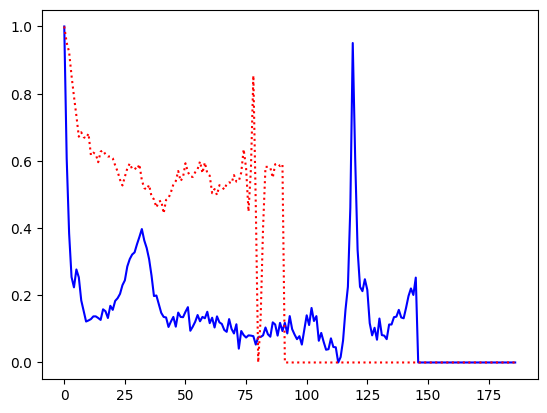

In [19]:
# Define data series X1 and X2, and Y-axis from 187 columns sampled at 125 htz.
X1 = df_ab10.iloc[0, 0:187]
X2 = df_ab10.iloc[1, 0:187]
Y = np.arange(187)
plt.plot(Y, X1, 'b-')
plt.plot(Y, X2, 'r:')


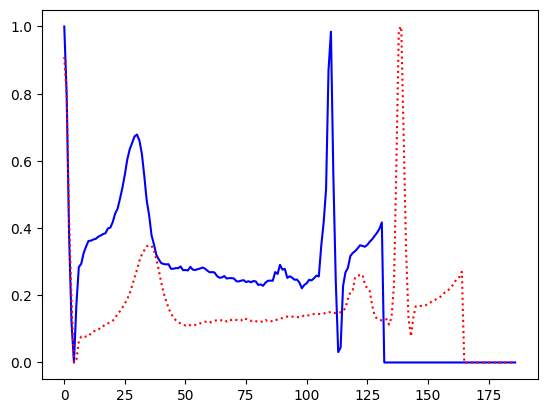

In [20]:
# Let's try that for the normal dataset
X1 = df_n10.iloc[0, 0:187]
X2 = df_n10.iloc[1, 0:187]
Y = np.arange(187)
plt.plot(Y, X1, 'b-')
plt.plot(Y, X2, 'r:')

[]

<Figure size 640x480 with 0 Axes>

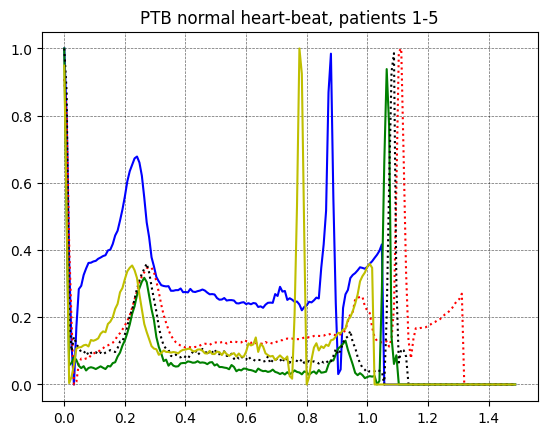

In [26]:
# now expand the normal heart beat figure for 5 samples
X1 = df_n10.iloc[0, 0:187]
X2 = df_n10.iloc[1, 0:187]
X3 = df_n10.iloc[2, 0:187]
X4 = df_n10.iloc[3, 0:187]
X5 = df_n10.iloc[4, 0:187]
Y = np.arange(187)/125

fig1 = plt.figure(1)
ax1 = plt.subplots(1, 1)
plt.plot(Y, X1, 'b-', Y, X2, 'r:', Y, X3, 'g-', Y, X4, 'k:', Y, X5, 'y-')
plt.grid(color='k', linestyle='--', linewidth=0.5, alpha=0.6)
plt.title('PTB normal heart-beat, patients 1-5')
plt.plot()

OK, seems to be working.  Let's add more data and creat 2 figures

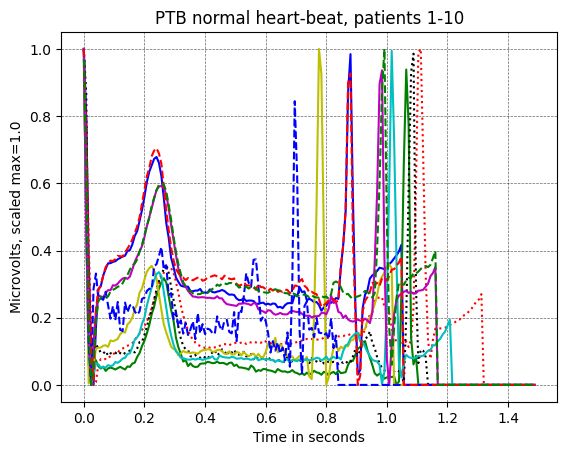

In [40]:
# To refactor the code using a for loop to iterate over the indices
# and handle the creation of X1, X2, X3, etc., we can store the
# data in a list and then use a loop to plot them.

# List comprehension. Create list of X[i] values.
X = [df_n10.iloc[i, 0:187] for i in range(10)]
Y = np.arange(187)/125

# Create figure object
fig2, ax2 = plt.subplots(1, 1)
# Define the line styles and colors
colors = ['b-', 'r:', 'g-', 'k:', 'y-', 'c-', 'm-', 'b--', 'r--', 'g--']

for i in range(10):
    plt.plot(Y, X[i], colors[i])  # Plot each X[i] with the corresponding color/style

plt.grid(color='k', linestyle='--', linewidth=0.5, alpha=0.6)
plt.title('PTB normal heart-beat, patients 1-10')
plt.xlabel('Time in seconds')  # x-axis label
plt.ylabel('Microvolts, scaled max=1.0')  # y-axis label
plt.show()

In [41]:
# Save the figure to a file
fig2.savefig('ptb_normal_patients10.png')

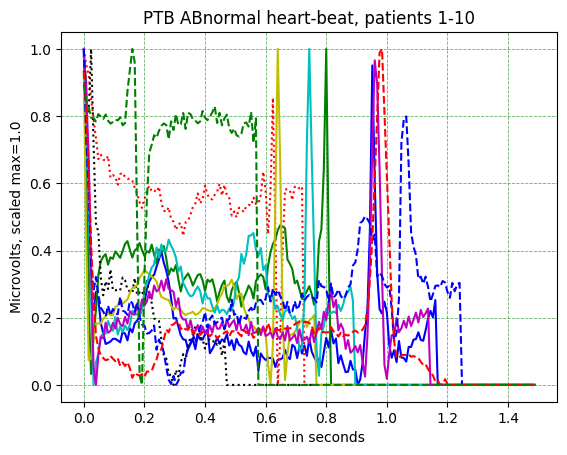

In [42]:
# Repeat for abnormal heart beats data
# List comprehension. Create list of X[i] values.
X = [df_ab10.iloc[i, 0:187] for i in range(10)]
Y = np.arange(187)/125

# Create figure object
fig3, ax = plt.subplots(1, 1)
# Define the line styles and colors
colors = ['b-', 'r:', 'g-', 'k:', 'y-', 'c-', 'm-', 'b--', 'r--', 'g--']

for i in range(10):
    plt.plot(Y, X[i], colors[i])  # Plot each X[i] with the corresponding color/style

plt.grid(color='g', linestyle='--', linewidth=0.6, alpha=0.6)
plt.title('PTB ABnormal heart-beat, patients 1-10')
plt.xlabel('Time in seconds')  # x-axis label
plt.ylabel('Microvolts, scaled max=1.0')  # y-axis label
plt.show()

In [43]:
# Save the figure to a file
fig3.savefig('ptb_ab_patients10.png')

Now let's compare the two figures side by side.  
Remember this is only 10 samples each we are comparing, for a quick look.

In [ ]:
# compare these figures side by side


Xn = [df_n10.iloc[i, 0:187] for i in range(10)]
Xab = [df_ab10.iloc[i, 0:187] for i in range(10)]
Y = np.arange(187)/125

# Create figure object
fig4 = (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Define the line styles and colors
colors = ['b-', 'r:', 'g-', 'k:', 'y-', 'c-', 'm-', 'b--', 'r--', 'g--']

# create ax1
for i in range(10):
    ax1.plot(Y, X[i], colors[i])  # Plot each X[i] with the corresponding color/style

ax1.grid(color='g', linestyle='--', linewidth=0.6, alpha=0.6)
ax1.set_title('PTB ABnormal heart-beat, patients 1-10')
ax1.set_xlabel('Time in seconds')  # x-axis label
ax1.set_ylabel('Microvolts, scaled max=1.0')  # y-axis label

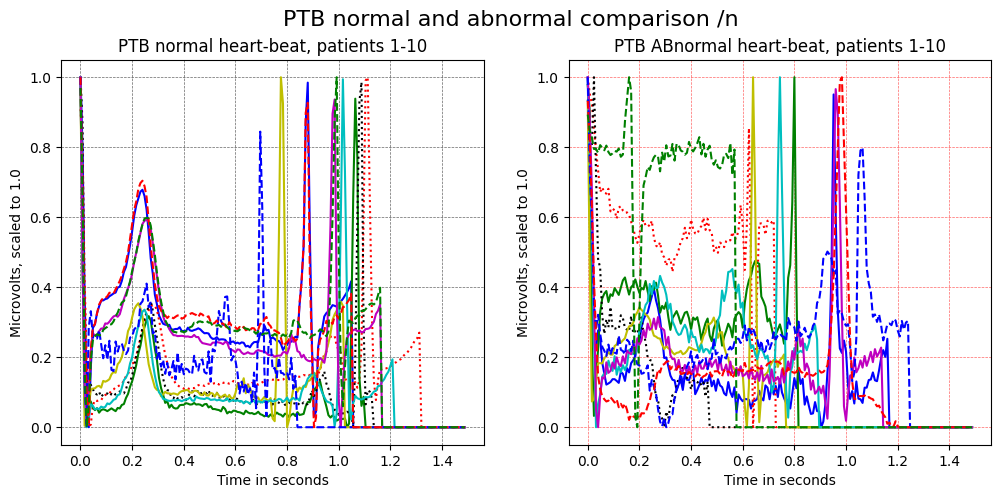

In [47]:
# Let's combine the two plots into one figure object

# List comprehensions
Xn = [df_n10.iloc[i, 0:187] for i in range(10)]
Xab = [df_ab10.iloc[i, 0:187] for i in range(10)]
Y = np.arange(187) / 125  # Adjusted time values for x-axis

# Create the figure and two axes (ax1, ax2)
fig4, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Define 10 distinct line styles/colors
colors = ['b-', 'r:', 'g-', 'k:', 'y-', 'c-', 'm-', 'b--', 'r--', 'g--']

# Plot each X[i] with the corresponding color/style on ax1 and ax2
for i in range(10):
    ax1.plot(Y, Xn[i], colors[i])
    ax2.plot(Y, Xab[i], colors[i])

# Customize ax1 (left plot)
ax1.grid(color='k', linestyle='--', linewidth=0.5, alpha=0.6)
ax1.set_title('PTB normal heart-beat, patients 1-10')
ax1.set_xlabel('Time in seconds')  # x-axis label
ax1.set_ylabel('Microvolts, scaled to 1.0')  # y-axis label

# Customize ax2 (right plot)
ax2.grid(color='r', linestyle='--', linewidth=0.5, alpha=0.6)
ax2.set_title('PTB ABnormal heart-beat, patients 1-10')
ax2.set_xlabel('Time in seconds')
ax2.set_ylabel('Microvolts, scaled to 1.0')

# Set a title for the whole figure
fig4.suptitle('PTB normal and abnormal comparison /n', fontsize=16)

# Save the figure
fig4.savefig('ptb_side_by_side_p10.png')

plt.show()